## Importing the necessary libraries

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Reading the data.csv and analyzing it

In [2]:
df = pd.read_csv('Data/raw.csv')

In [4]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainTomorrow
0,Albury,13.4,22.9,0.6,2.4,8.3,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,8.0,0.0,False
1,Albury,7.4,25.1,0.0,3.6,10.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,7.0,1.0,False
2,Albury,12.9,25.7,0.0,2.6,4.4,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,8.0,2.0,False
3,Albury,9.2,28.0,0.0,14.6,8.9,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,0.0,5.0,False
4,Albury,17.5,32.3,1.0,5.4,3.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,7.0,8.0,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   Evaporation    145460 non-null  float64
 5   Sunshine       145460 non-null  float64
 6   WindGustDir    145460 non-null  object 
 7   WindGustSpeed  145460 non-null  float64
 8   WindDir9am     145460 non-null  object 
 9   WindDir3pm     145460 non-null  object 
 10  WindSpeed9am   145460 non-null  float64
 11  WindSpeed3pm   145460 non-null  float64
 12  Humidity9am    145460 non-null  float64
 13  Humidity3pm    145460 non-null  float64
 14  Pressure9am    145460 non-null  float64
 15  Cloud9am       145460 non-null  float64
 16  Cloud3pm       145460 non-null  float64
 17  RainTomorrow   145460 non-nul

## Checking for any null values

In [6]:
df.isnull().sum()*100/len(df)

Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Cloud9am         0.0
Cloud3pm         0.0
RainTomorrow     0.0
dtype: float64

## Insights
- We have 145459 rows of data
- There are no null values

## Identifying the categorical and numerical data

In [9]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print(f"Numerical Features Count {len(numerical_feature)}")
print(f"Categorical feature Count {len(categorical_feature)}")

Numerical Features Count 14
Categorical feature Count 4


In [10]:
numerical_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Cloud9am',
 'Cloud3pm',
 'RainTomorrow']

In [11]:
categorical_feature

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']

In [12]:
df[numerical_feature].corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,RainTomorrow
MinTemp,1.000000,0.733335,0.045802,0.305438,0.034798,0.184574,0.177643,0.177179,-0.231038,0.006174,-0.432271,0.049299,0.014825,0.082255
MaxTemp,0.733335,1.000000,-0.262982,0.377512,0.234194,0.078237,0.017255,0.052880,-0.497532,-0.498474,-0.318759,-0.175019,-0.161938,-0.156313
Rainfall,0.045802,-0.262982,1.000000,-0.145956,-0.190706,0.143865,0.097256,0.077540,0.391159,0.408150,-0.171567,0.212868,0.179862,0.323354
Evaporation,0.305438,0.377512,-0.145956,1.000000,0.180619,0.133385,0.120170,0.085467,-0.318108,-0.240149,-0.191446,-0.098321,-0.096740,-0.073417
Sunshine,0.034798,0.234194,-0.190706,0.180619,1.000000,-0.013489,0.004828,0.026370,-0.249288,-0.317528,0.022193,-0.299892,-0.309680,-0.229066
WindGustSpeed,0.184574,0.078237,0.143865,0.133385,-0.013489,1.000000,0.580955,0.661913,-0.218508,-0.032141,-0.421874,0.040463,0.058742,0.216164
WindSpeed9am,0.177643,0.017255,0.097256,0.120170,0.004828,0.580955,1.000000,0.507652,-0.273328,-0.033233,-0.213168,0.012817,0.031126,0.084947
WindSpeed3pm,0.177179,0.052880,0.077540,0.085467,0.026370,0.661913,0.507652,1.000000,-0.146452,0.015144,-0.275161,0.034119,0.012405,0.081106
Humidity9am,-0.231038,-0.497532,0.391159,-0.318108,-0.249288,-0.218508,-0.273328,-0.146452,1.000000,0.659063,0.134403,0.275705,0.209899,0.252190
Humidity3pm,0.006174,-0.498474,0.408150,-0.240149,-0.317528,-0.032141,-0.033233,0.015144,0.659063,1.000000,-0.023631,0.311475,0.312853,0.433167


AttributeError: QuadMesh.set() got an unexpected keyword argument 'figsize'

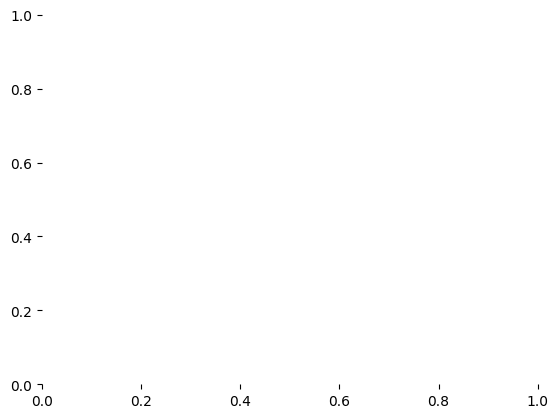

In [16]:
sns.heatmap(df[numerical_feature].corr(), annot = True, figsize=(20,20))